In [1]:
from textblob import TextBlob
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
from textblob import TextBlob
nltk.download('punkt')
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pranjalideshmukh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranjalideshmukh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Very competent check in sta...
1,"✅ Trip Verified | Check in was so slow, no se..."
2,✅ Trip Verified | My review relates to the ap...
3,✅ Trip Verified | This was my first time flyin...
4,✅ Trip Verified | Lots of cancellations and d...


In [4]:
df.to_csv('BAreviews.csv')

In [5]:
csv_path="BAreviews.csv"
df1 = pd.DataFrame()
df1=pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])

0      ✅ Trip Verified |  Very competent check in sta...
1      ✅ Trip Verified |  Check in was so slow, no se...
2      ✅ Trip Verified |  My review relates to the ap...
3      ✅ Trip Verified | This was my first time flyin...
4      ✅ Trip Verified |  Lots of cancellations and d...
                             ...                        
995    ✅ Trip Verified |  Hong Kong to London Heathro...
996    ✅ Trip Verified |  Los Angeles to London Heath...
997    ✅ Trip Verified |  Hamburg to Abu Dhabi via Lo...
998    ✅ Trip Verified |  Overnight club world flight...
999    ✅ Trip Verified |  London Heathrow to Vancouve...
Name: reviews, Length: 1000, dtype: object


In [6]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [7]:
#There are no null/missing values in the data set.The data contains 1000 unique values.
#Data cleaning 
#Removing Trip verified and Not verified along with trailling spaces and converting data 
#into lowercase

In [8]:
df1['reviews']=df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']=df1['reviews'].str.lower()
df1

,Unnamed: 0,reviews
0,0,"y competent check in staff, saw had a problem ..."
1,1,"check in was so slow, no self check in and bag..."
2,2,my review relates to the appalling experiences...
3,3,his was my first time flying with ba & i was p...
4,4,lots of cancellations and delays and no one ap...
...,...,...
995,995,hong kong to london heathrow on b777 in club w...
996,996,los angeles to london heathrow return. outbou...
997,997,hamburg to abu dhabi via london. hamburg to he...
998,998,overnight club world flight from rio to london...


In [9]:
#to remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0      y competent check in staff saw had a problem w...
1      check in was so slow no self check in and bag ...
2      my review relates to the appalling experiences...
3      his was my first time flying with ba  i was pl...
4      lots of cancellations and delays and no one ap...
                             ...                        
995    hong kong to london heathrow on b777 in club w...
996    los angeles to london heathrow return  outboun...
997    hamburg to abu dhabi via london hamburg to hea...
998    overnight club world flight from rio to london...
999    london heathrow to vancouver the 747 on this r...
Name: reviews, Length: 1000, dtype: object


<ipython-input-9-495972fe98f9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [10]:
#tokenize
#print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

['y', 'competent', 'check', 'in', 'staff', 'saw', 'had', 'a', 'problem', 'with', 'my', 'left', 'arm', 'and', 'insisted', 'i', 'could', 'not', 'take', 'exit', 'seat', 'moved', 'me', 'to', 'row', '30', 'where', 'the', 'middle', 'seat', 'was', 'empty', 'on', 'the', 'other', 'hand', 'on', 'board', 'huge', 'line', 'for', 'toilets', '45', 'min', 'into', 'a', '230', 'min', 'flight', 'a', 'crew', 'member', 'realised', 'one', 'of', 'the', 'toilets', 'is', 'closed', 'as', 'crew', 'had', 'put', 'their', 'luggage', 'there', 'they', 'announced', 'that', 'they', 'could', 'not', 'serve', 'hot', 'drinks', 'on', 'this', 'flight', 'and', 'to', 'bear', 'with', 'them', 'as', 'service', 'will', 'be', 'slow', 'on', 'asking', 'why', 'they', 'did', 'not', 'give', 'us', 'enough', 'cups', 'for', 'hot', 'drinks', 'and', 'the', 'card', 'machine', 'is', 'not', 'working', 'so', 'we', 'have', 'to', 'fill', 'out', 'each', 'credit', 'card', 'slip', 'a', 'bottle', 'of', 'water', 'and', 'a', 'nutrigrain', 'bar']


In [11]:
#removing stopwords
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  competent check staff saw problem left arm ins...
1            1  check slow self check bag drop boarding ok fli...
2            2  review relates appalling experiences british a...
3            3  first time flying ba pleasantly surprised isla...
4            4  lots cancellations delays one apologized edinb...
5            5  ba 242 6223 boarding delayed due late arrival ...
6            6  nly first flight 17 years also first time back...
7            7  husband flying madrid 3rd february legal matte...
8            8  organised boarding process really friendly cre...
9            9  outward journey ba245 london buenos aires club...
10          10  check agent lhr helpful friendly flight crew s...
11          11  disappointing book ba fly day return flight 6p...
12          12  excellent service ground board first class pro...
13          13  good lounge cape town time departure drinks hi...
14        

In [12]:
#Calculate polarity to gather sentiment tags
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
df1['polarity'] = df1['reviews'].apply(polarity_calc)
df1['tag'] = df1['polarity'].apply(tag_cal)
print(df1.head(20))


    Unnamed: 0                                            reviews  polarity  \
0            0  competent check staff saw problem left arm ins...  0.090000   
1            1  check slow self check bag drop boarding ok fli...  0.310034   
2            2  review relates appalling experiences british a... -0.030177   
3            3  first time flying ba pleasantly surprised isla...  0.347727   
4            4  lots cancellations delays one apologized edinb...  0.125000   
5            5  ba 242 6223 boarding delayed due late arrival ...  0.468750   
6            6  nly first flight 17 years also first time back...  0.211944   
7            7  husband flying madrid 3rd february legal matte...  0.123529   
8            8  organised boarding process really friendly cre...  0.627083   
9            9  outward journey ba245 london buenos aires club...  0.012879   
10          10  check agent lhr helpful friendly flight crew s...  0.011012   
11          11  disappointing book ba fly day return

In [13]:
#Analysing 
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    31.1
Neutral      1.4
Positive    67.5
dtype: float64

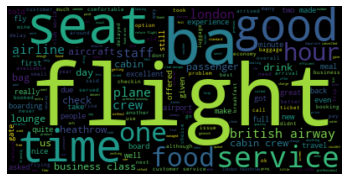

In [14]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

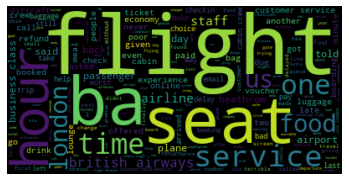

In [15]:
text2= " "        
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

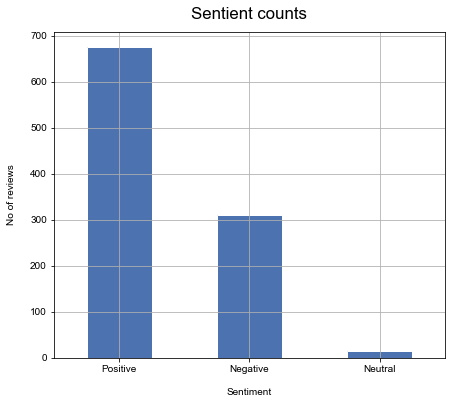

In [16]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentient counts", y=1.02);

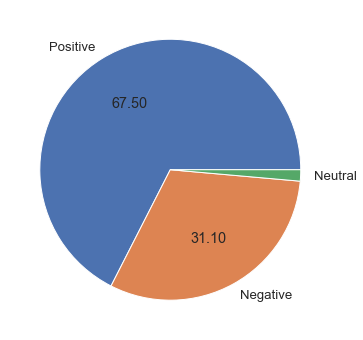

In [17]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''
sns.set(font_scale=1.2)
df1['tag'].value_counts().plot(kind='pie',figsize=(6,6),autopct=autopct)
plt.ylabel("",labelpad=11);
